# Perceptron and MLP

**LAB 7 2017** - https://harvard-iacs.github.io/2018-CS109A/labs/lab-7/solutions/ <br>
**Section 6** - https://harvard-iacs.github.io/2018-CS109A/sections/section-6/demo/
- Single node
- Multiple nodes in single layer
- Feedforward network fpr polynomial regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

%matplotlib inline

<img src="./images/Perceptron.png" style="width: 700px;" >
<img src="./images/Perceptron_logistic.png" style="width: 700px;" >

## Single Node

We will use a single node to learn a gaussian function $f(x) = e^{-x^2}$ given some input $x$. Here are the steps for it:

1. Combine inputs with some weights $w$ and bias $b$ to get $z = wx + b$. This transformation is called an **affine** transformation.
2. Pass z through an activation function (sigmoid) to get the output, $f^{hat}$

Using the sigmoid activation function, which here is called the logistic function. This function gives values (probabilities) between (0,1). Note that the probability is greater than 0.5 for $z > 0$ or we say that activation occurs when z changes sign. This happens when $z = 0$ or $x = -b/w$

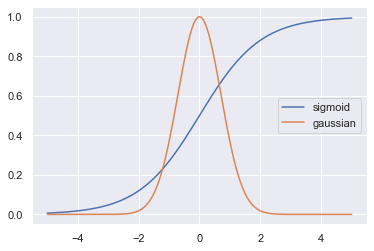

In [9]:
# Plot the sigmoid

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-5, 5, 500)
plt.plot(x, sigmoid(x), label = 'sigmoid')
#plt.legend()

# Gaussian Function
f = np.exp(-x*x)
plt.plot(x, f, label = 'gaussian')
plt.legend(loc = 'right')



In [384]:
# Affine function takes x, w, b and gives x

def affine(x, w, b):
    return x*w + b

# lets enter some values, run the affine and sigmoid transformations
w = -4.5
b = 4.0

h = sigmoid(affine(x, w, b)) # this is the predicted output

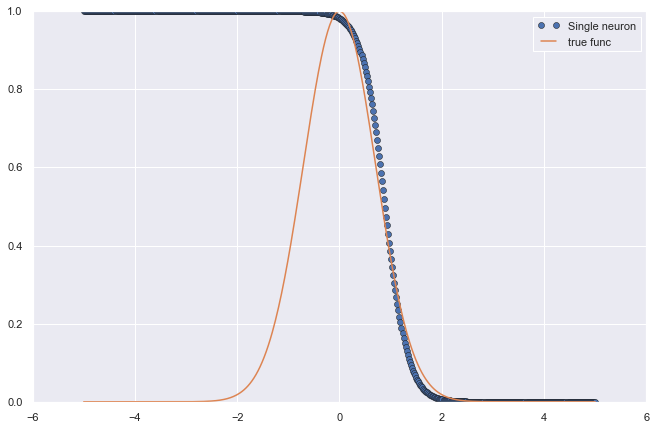

In [41]:
plt.figure(figsize = (11,7))
plt.plot(x, h, 'o', label = 'Single neuron')
plt.plot(x, f, label = 'true func')
plt.legend()


It looks like the sigmoid function with the w and b is close to the gaussian between 0 and 2 but then abruptly switches off. We can try varying the w and b to see how much closer we can get to the real gaussian fuction. We see that this still doesn't get very close.

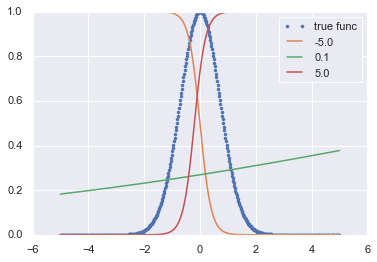

In [385]:
w = [-5.0, 0.1, 5.0] # Create a list of weights
b = [0.0, -1.0, 1.0] # Create a list of biases

plt.plot(x, f, '.', label = 'true func')

for wi, bi in zip(w,b):
    plt.plot(x, sigmoid(affine(x, wi, bi)), label = str(wi))
    
plt.legend();    


## Multiple Percetron in Single layer
You have two sets of weights and biases to get $h1$ and $h2$, which then gets passed through sigmoids to give two ouputs. These two outputs are combined to give the $f^{hat}$

In [402]:
x = np.linspace(-5.0, 5.0, 500)
f = np.exp(-x*x)

# two sets of wrights and biases
w = np.array([3.5, -3.5]) 
b = np.array([3, 3])

# affine transforms
z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]

# sigmoid functions
h1 = sigmoid(z1)
h2 = sigmoid(z2)

# plot each of them

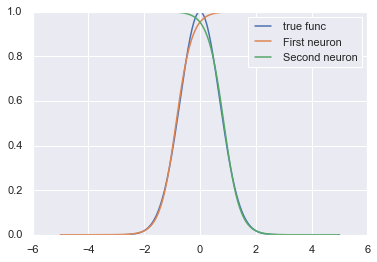

In [406]:
#plt.figure(figsize = (11,7))
plt.plot(x, f, label = 'true func')
plt.plot(x, h1, label = 'First neuron')
plt.plot(x, h2, label = 'Second neuron')
plt.legend();

Lets combine the two neurons to predict the output... looks like we need a better combination of h1 and h2

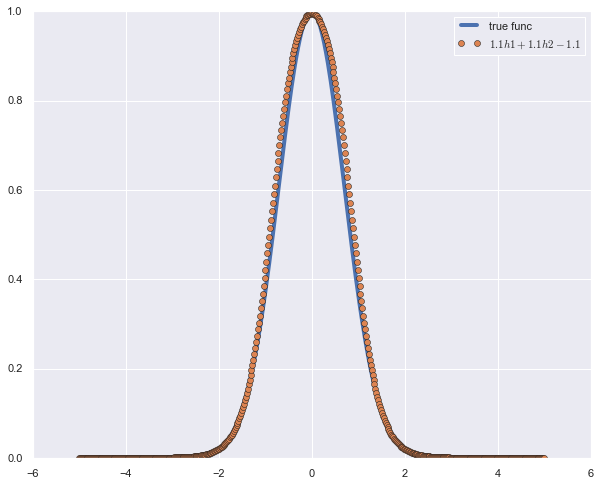

In [446]:
plt.figure(figsize = (10,8))

wout = np.ones(2) # weights given to combine the sigmoid functions h1 and h2
bout = 0 # bias to this combination

yout = wout[0] * h1 + wout[1] * h2 + bout

plt.plot(x, f, label = 'true func', lw = 4)
#plt.plot(x, yout, 'o', label = '$h1 + h2$')

# change the weights and biases
wout = np.array([1.1, 1.1]) 
bout = -1.1

yout = wout[0] * h1 + wout[1] * h2 + bout
plt.plot(x, yout, 'o', label = '$1.1h1 + 1.1h2 - 1.1$')
plt.legend();


## Feed Forward Neural Network
Fit linear and poly regression to compare with feed forward NN

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split

(100, 2)


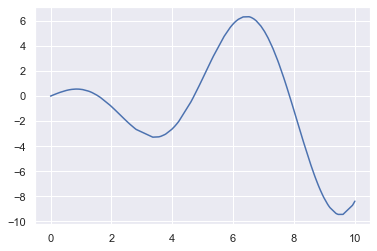

In [5]:
fun_df = pd.read_csv("./data/fun_dataset.csv")
fun_df = fun_df[['x','y']]
print(fun_df.shape)
fun_df = fun_df.sort_values(by = 'x')
plt.plot(fun_df.x, fun_df.y)

In [6]:
X = fun_df.x
Y = fun_df.y

# Splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=9001)

# reshaping data
x_train, y_train = x_train.values.reshape(-1,1), y_train.values
x_test, y_test = x_test.values.reshape(-1,1), y_test.values

# normalizing values
x_train = (x_train - np.mean(x_train))/np.std(x_train)
y_train = (y_train - np.mean(y_train))/np.std(y_train)

x_test = (x_test - np.mean(x_test))/np.std(x_test)
y_test = (y_test - np.mean(y_test))/np.std(y_test)


### Initialize 1 for all weights and biases
Define number of hidden layer and nodes in each layer. We are using one 
hidden layer with three nodes.
- Think of it as L0, L1, L2, where L0 is input, L1 is hidden layer, L2 is output
- There will be 3 weights and 3 biases for L1, and three weights and one bias for L2. 
- This corresponds to (3,2) matrix for L1 and (1,3) matrix for L2

In [7]:
input_dim = 1  # i.e input x is a 1D array
output_dim = 1 # output y is a 1D array

num_hidden_layers = 1
num_hidden_nodes = 3

WL0 (3, 2)
[[1. 1.]
 [1. 1.]
 [1. 1.]]
Second column is for biases 

WL1 (1, 4)
[[1. 1. 1. 1.]]
Last column is for biases

L0 (75, 2)
a0 (3, 75)
z0 (3, 75)
z0 (4, 75)


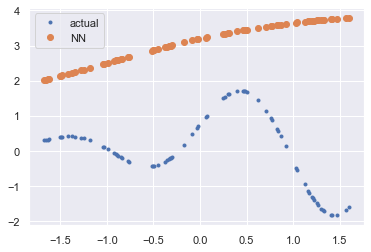

In [10]:
# ASSIGNING WEIGHTS

# all 1s
WL0 = np.ones((num_hidden_nodes, input_dim+1))
WL1 = np.ones((output_dim, num_hidden_nodes+1))  


print("WL0", WL0.shape)
print(WL0)
print("Second column is for biases \n")

print("WL1", WL1.shape)
print(WL1)
print("Last column is for biases\n")

# FORWARD PROPAGATION

# input layer
ones = np.ones((len(x_train),1))    
L0 = x_train 
L0 = np.append(L0, ones, axis=1)

print("L0", L0.shape)

# hidden layer
a0 = np.dot(WL0, L0.T)
z0 = {'sigmoid': sigmoid(a0)}

print("a0", a0.shape)
print("z0", z0['sigmoid'].shape)

# output layer 
ones = np.ones((len(y_train),1))
z0['sigmoid'] = np.append(z0['sigmoid'].T, ones,axis=1).T

print("z0", z0['sigmoid'].shape)

# affine 
a1 = {'sigmoid': np.dot(WL1, z0['sigmoid'])}
z1 = a1

plt.plot(x_train, y_train, '.', label = 'actual')
plt.plot(x_train, z1['sigmoid'][0], 'o', label = 'NN')
plt.legend(loc = 'upper left')


### Using a different set of weights

WL0 (3, 2)
[[ 1.0e+01  1.0e-02]
 [ 1.3e+01 -1.0e+01]
 [ 1.0e-01  2.0e+01]]
Second column is for biases 

WL1 (1, 4)
[[ 1.75 -1.75  1.   -1.  ]]
Last column is for biases

L0 (75, 2)
a0 (3, 75)
z0 (3, 75)
z0 (4, 75)


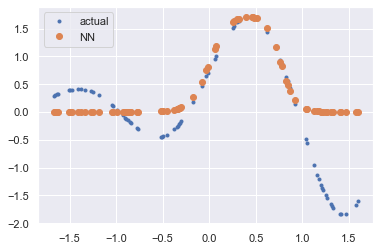

In [11]:
# ASSIGNING WEIGHTS

# Obtained using trial and error
WL0 = np.array([[10,0.01], [13,-10], [0.1,20]])
WL1 = np.array([[1.75, -1.75, 1, -1]])


print("WL0", WL0.shape)
print(WL0)
print("Second column is for biases \n")

print("WL1", WL1.shape)
print(WL1)
print("Last column is for biases\n")

# FORWARD PROPAGATION

# input layer
ones = np.ones((len(x_train),1))    
L0 = x_train 
L0 = np.append(L0, ones, axis=1)

print("L0", L0.shape)

# hidden layer
a0 = np.dot(WL0, L0.T)
z0 = {'sigmoid': sigmoid(a0)}

print("a0", a0.shape)
print("z0", z0['sigmoid'].shape)

# output layer 
ones = np.ones((len(y_train),1))
z0['sigmoid'] = np.append(z0['sigmoid'].T, ones,axis=1).T

print("z0", z0['sigmoid'].shape)

# affine 
a1 = {'sigmoid': np.dot(WL1, z0['sigmoid'])}
z1 = a1

plt.plot(x_train, y_train, '.', label = 'actual')
plt.plot(x_train, z1['sigmoid'][0], 'o', label = 'NN')
plt.legend(loc = 'upper left')

### Increase number of nodes to 4

WL0 (4, 2)
[[ 10   1]
 [ -5  -5]
 [ 14 -12]
 [ -5   5]]
Second column is for biases 

WL1 (1, 5)
[[ 2.   1.  -2.5  0.5 -1. ]]
Last column is for biases

L0 (75, 2)
a0 (4, 75)
z0 (4, 75)
z0 (5, 75)


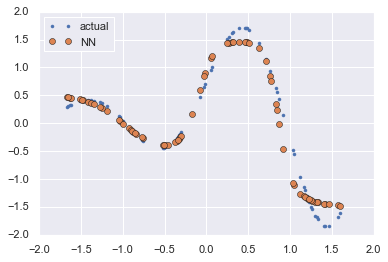

In [335]:
# Re-defining the number of hidden nodes
num_hidden_nodes = 4

# ASSIGNING WEIGHTS

# Obtained using trial and error
WL0 = np.array([[10,1], [-5,-5], [14,-12], [-5,5]])
WL1 = np.array([[2, 1, -2.5, 0.5, -1]])

print("WL0", WL0.shape)
print(WL0)
print("Second column is for biases \n")

print("WL1", WL1.shape)
print(WL1)
print("Last column is for biases\n")

# FORWARD PROPAGATION

# input layer
ones = np.ones((len(x_train),1))    
L0 = x_train 
L0 = np.append(L0, ones, axis=1)

print("L0", L0.shape)

# hidden layer
a0 = np.dot(WL0, L0.T)
z0 = {'sigmoid': sigmoid(a0)}

print("a0", a0.shape)
print("z0", z0['sigmoid'].shape)

# output layer 
ones = np.ones((len(y_train),1))
z0['sigmoid'] = np.append(z0['sigmoid'].T, ones,axis=1).T

print("z0", z0['sigmoid'].shape)

# affine 
a1 = {'sigmoid': np.dot(WL1, z0['sigmoid'])}
z1 = a1

plt.plot(x_train, y_train, '.', label = 'actual')
plt.plot(x_train, z1['sigmoid'][0], 'o', label = 'NN')
plt.legend(loc = 'upper left')

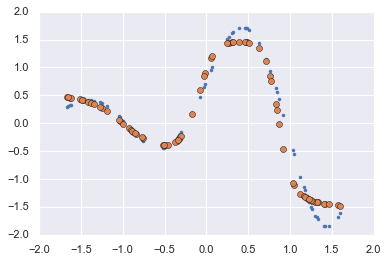

In [320]:
plt.plot(x_train, y_train, '.')
plt.plot(x_train, z1['sigmoid'][0], 'o')

## Gradient Descent
Demostrate gradient descent from first principles for $f(x) = \sin(x) + \cos(x)$. Derivative at each point is $f'(x) = \cos(x) - \sin(x)$. 

Since there are multiple inputs, we can take derivate of a subset of inputs and update our $x$. Say $f'_1$ and $f'_2$ are the gradients from inputs 1 and 2, 

Update the intial guess as $x_{i+1} = x_i + 0.1*f'(x) $

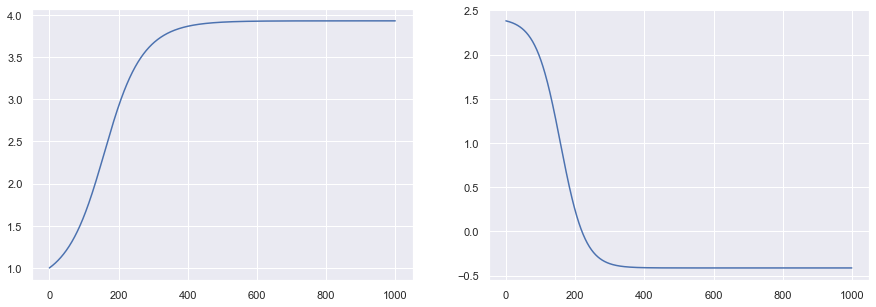

In [21]:
# inline function for f(x)
f = lambda x: np.sin(x) + np.cos(x)

# inline function for df/dx
der_f_x = lambda x: np.cos(x) - np.sin(x)

x_n_minus_1 = 1 # initial guess for x
f_x_min = -1    # intial guess for min value of f(x)
x_vals = [x_n_minus_1]
errors = []

l = 0.01 # learning rate

for i in range(1000):
    gradient_eval = der_f_x(x_n_minus_1)  # gradient at x_(n-1), i.e previous point
    x_n = x_n_minus_1 - l*gradient_eval   # update x
    f_eval = f(x_n) # evaluate f at new point
    error = f_eval - f_x_min # find error in approx
    
    errors.append(error)  # storing errors
    x_vals.append(x_n)    # storing the x_min
    
    x_n_minus_1 = x_n
    
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(range(1001), x_vals)
plt.subplot(1,2,2)
plt.plot(range(1000), errors)


